## PCA Demonstration in Python

In [34]:
# Importing the required libraries

In [35]:
import numpy as np, pandas as pd

In [36]:
data = pd.read_csv("Iris.csv")

In [37]:
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
y = data.pop("iris")

In [39]:
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Scaling the data

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X = data.copy()

In [44]:
x = scaler.fit_transform(X)

In [45]:
x[:5,:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Applying PCA on the data

In [46]:
from sklearn.decomposition import PCA

In [47]:
?PCA

In [48]:
pca = PCA(random_state=42)

In [49]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca.components_.round(2)

array([[ 0.52, -0.26,  0.58,  0.57],
       [ 0.37,  0.93,  0.02,  0.07],
       [-0.72,  0.24,  0.14,  0.63],
       [-0.26,  0.12,  0.8 , -0.52]])

In [51]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [52]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

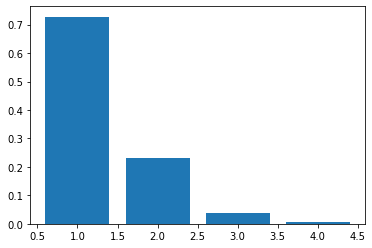

In [53]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [54]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

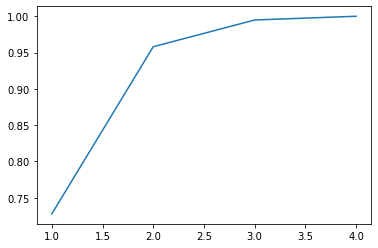

In [55]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 2 components

In [56]:
pc2 = PCA(n_components=2, random_state=42)

In [57]:
newdata = pc2.fit_transform(x)

In [58]:
newdata.shape

(150, 2)

Making a dataframe out of it for convenience



In [59]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [60]:
df_final = pd.concat([df, y], axis=1)

In [61]:
df_final.head()

,PC1,PC2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Plotting the data

In [62]:
import seaborn as sns

E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


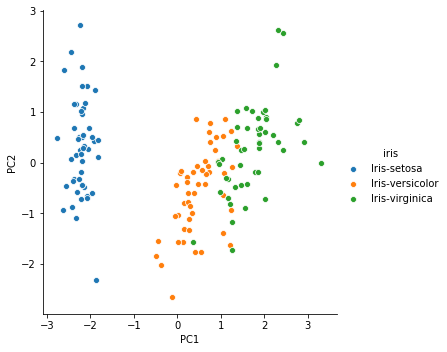

In [63]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "iris", size=5)